In [1]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import os
import cv2
import time
import csv
import shutil
import numpy as np
import pandas as pd
import splitfolders
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# GENERATORS

In [38]:
#generators
ds_train = keras.utils.image_dataset_from_directory(
    directory = r'D:\NITS\Major Project\Action_Folder\GA_DF_Splitted\train',
    labels = 'inferred',
    label_mode= 'categorical',
    batch_size=32,
    image_size=(224,224)

)

Found 1438 files belonging to 18 classes.


In [39]:
#generators
ds_test = keras.utils.image_dataset_from_directory(
    directory = r'D:\NITS\Major Project\Action_Folder\GA_DF_Splitted\test',
    labels = 'inferred',
    label_mode= 'categorical',
    batch_size=32,
    image_size=(224,224)

)

Found 215 files belonging to 18 classes.


In [40]:
#generators
ds_val = keras.utils.image_dataset_from_directory(
    directory = r'D:\NITS\Major Project\Action_Folder\GA_DF_Splitted\val',
    labels = 'inferred',
    label_mode= 'categorical',
    batch_size=32,
    image_size=(224,224)

)

Found 408 files belonging to 18 classes.


In [41]:
# Create an AdamW optimizer with specified beta1 and beta2 values
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)#, beta_1=0.9, beta_2=0.999)

In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224,224, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(18, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(ds_train, epochs=15, validation_data=ds_val)

Epoch 1/15
45/45 [==============================] - 170s 4s/step - loss: 12.5417 - accuracy: 0.1829 - val_loss: 2.1564 - val_accuracy: 0.3946
Epoch 2/15
45/45 [==============================] - 160s 4s/step - loss: 1.8133 - accuracy: 0.4312 - val_loss: 1.7544 - val_accuracy: 0.4853
Epoch 3/15
45/45 [==============================] - 156s 3s/step - loss: 1.5116 - accuracy: 0.5042 - val_loss: 1.6700 - val_accuracy: 0.4755
Epoch 4/15
45/45 [==============================] - 158s 4s/step - loss: 1.2885 - accuracy: 0.5765 - val_loss: 1.4625 - val_accuracy: 0.4975
Epoch 5/15
45/45 [==============================] - 154s 3s/step - loss: 1.0961 - accuracy: 0.6328 - val_loss: 1.3391 - val_accuracy: 0.5735
Epoch 6/15
45/45 [==============================] - 157s 3s/step - loss: 0.8887 - accuracy: 0.6926 - val_loss: 1.3570 - val_accuracy: 0.5882
Epoch 7/15
45/45 [==============================] - 155s 3s/step - loss: 0.7867 - accuracy: 0.7413 - val_loss: 1.3376 - val_accuracy: 0.5833
Epoch 8/15
4

In [50]:
test_loss, test_accuracy = model.evaluate(ds_test)

7/7 [==============================] - 4s 464ms/step - loss: 1.9767 - accuracy: 0.5860


In [51]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     1.9766980409622192
Test Accuracy: 0.5860465168952942


In [52]:
predictions = model.predict(ds_test)

7/7 [==============================] - 5s 444ms/step


In [33]:
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

In [34]:
# Get true labels
true_labels = np.concatenate([y for x, y in ds_test], axis=0)
true_classes = np.argmax(true_labels, axis=1)

In [35]:
# # Calculate accuracy
# accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
# print(f"Accuracy: {accuracy}")
# Calculate accuracy
accuracy = np.round(np.sum(predicted_classes == true_classes) / len(true_classes), 5)
print(f"Accuracy: {accuracy}")

Accuracy: 0.04186


In [36]:
# Calculate precision, recall, and F1-score
conf_mat = confusion_matrix(true_classes, predicted_classes)
precision = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

In [37]:
# Print precision, recall, and F1-score for each class
for i in range(len(precision)):
    print(f"Class {i} - Precision: {precision[i]}, Recall: {recall[i]}, F1-Score: {f1[i]}")

Class 0 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 1 - Precision: 0.058823529411764705, Recall: 0.09090909090909091, F1-Score: 0.07142857142857142
Class 2 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 3 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 4 - Precision: 0.07692307692307693, Recall: 0.07692307692307693, F1-Score: 0.07692307692307693
Class 5 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 6 - Precision: 0.08333333333333333, Recall: 0.1, F1-Score: 0.0909090909090909
Class 7 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 8 - Precision: 0.09090909090909091, Recall: 0.08333333333333333, F1-Score: 0.08695652173913043
Class 9 - Precision: 0.07692307692307693, Recall: 0.058823529411764705, F1-Score: 0.06666666666666667
Class 10 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 11 - Precision: 0.08, Recall: 0.1, F1-Score: 0.08888888888888889
Class 12 - Precision: 0.0, Recall: 0.0, F1-Score: nan
Class 13 - Precision: 0.16666666666666666, Recall: 0.0833333333333

In [33]:
# Convert one-hot encoded labels back to class indices
y_true = np.concatenate([np.argmax(y, axis=1) for _, y in ds_test])
y_pred = np.argmax(predictions, axis=1)

In [34]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[0 0 0 1 2 2 1 0 0 1 0 0 0 2 0 1 1 0]
 [0 0 2 0 0 0 0 1 2 2 0 1 1 0 0 0 0 2]
 [3 0 1 1 0 0 1 1 2 2 0 1 0 0 0 1 1 0]
 [0 0 0 1 0 0 0 0 1 1 1 3 0 2 0 0 1 0]
 [0 2 1 0 1 1 0 0 1 1 1 2 1 0 0 1 1 0]
 [0 1 2 0 3 0 1 0 0 0 0 1 0 1 1 0 2 0]
 [0 0 2 0 0 1 0 0 1 0 1 1 0 0 0 1 3 0]
 [0 0 1 1 3 0 0 1 0 0 1 0 1 1 1 0 0 0]
 [0 1 1 0 2 1 0 0 1 1 1 2 1 0 0 0 1 0]
 [0 1 0 2 0 0 1 0 2 0 1 2 1 1 1 1 2 2]
 [0 1 0 0 0 1 0 1 3 1 0 2 1 0 1 0 0 1]
 [0 1 3 0 1 0 2 3 0 1 0 1 0 1 1 3 2 1]
 [1 1 1 0 1 2 1 0 2 0 0 0 1 0 0 0 1 0]
 [0 1 0 1 0 0 1 1 0 2 2 1 1 0 1 0 1 0]
 [2 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 2 0 0 0 0 0 0 1 1 1 2 0 0]
 [0 1 1 1 1 0 2 0 1 2 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 2 1 1 1 1 0 0 0 1 0]]


In [38]:
# Define class labels
class_labels = [str(i+1) for i in range(18)]

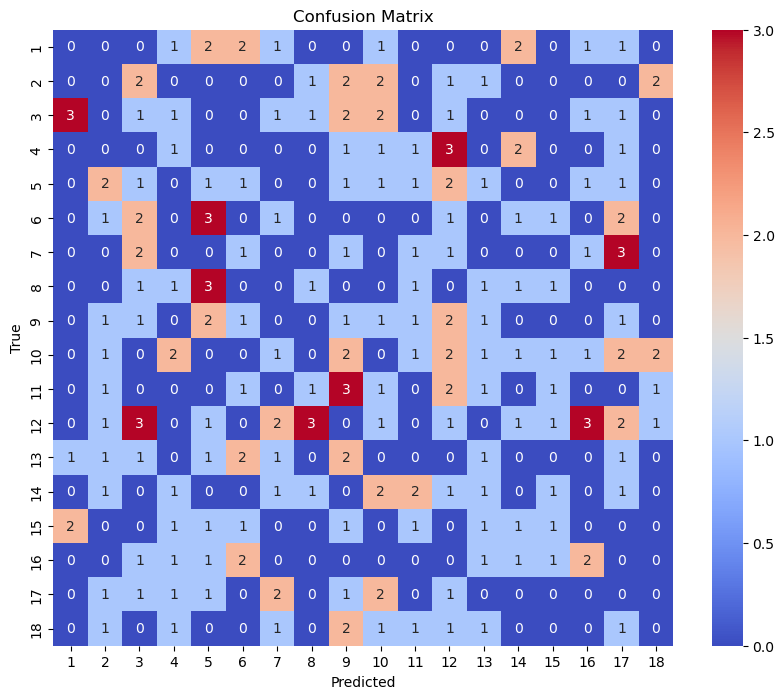

In [45]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('heat_map_GADF.png')
plt.show()

In [40]:
# Display classification report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        11
           2       0.06      0.07      0.07        14
           3       0.09      0.10      0.10        10
           4       0.06      0.08      0.07        13
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        10
           7       0.12      0.10      0.11        10
           8       0.05      0.08      0.06        12
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        12
          11       0.05      0.05      0.05        20
          12       0.09      0.09      0.09        11
          13       0.00      0.00      0.00        12
          14       0.12      0.10      0.11        10
          15       0.20      0.20      0.20        10
          16       0.00      0.00      0.00        10
    

In [ ]:


# Assuming 'history' is the variable storing the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig('1x2_training_validation_plot.png')
#plt.savefig('training_validation_plot.png')
plt.show()
